In [1]:
import comparison as cmp
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc_spc
from matplotlib import cm
TWOPI = cmp.TWOPI

Surface tension       = 57.8 [mPa*m]
Bulk viscosity        = 0.69 [mPa*s]


In [2]:
### NEEDS TO BE ACCELERATED WITH MPI!!! ###
noise_opt = 0.335
cl_friction_md = 5.659896689453016
# cmp.parametric_study(...)

In [3]:
FSL=25
FST=20
LBP=35
clf_plot_cutoff=4
Np=40

In [4]:
l_vec = np.linspace(0.5,3.5,Np)
a_vec = np.linspace(0,1.0,Np)
L, A = np.meshgrid(l_vec,a_vec,sparse=False,indexing='ij')

In [5]:
d1 = np.load('diff_ode.npy')
d2 = np.load('diff_sde.npy')
mr = np.load('mu_f_ratio.npy')

<IPython.core.display.Javascript object>


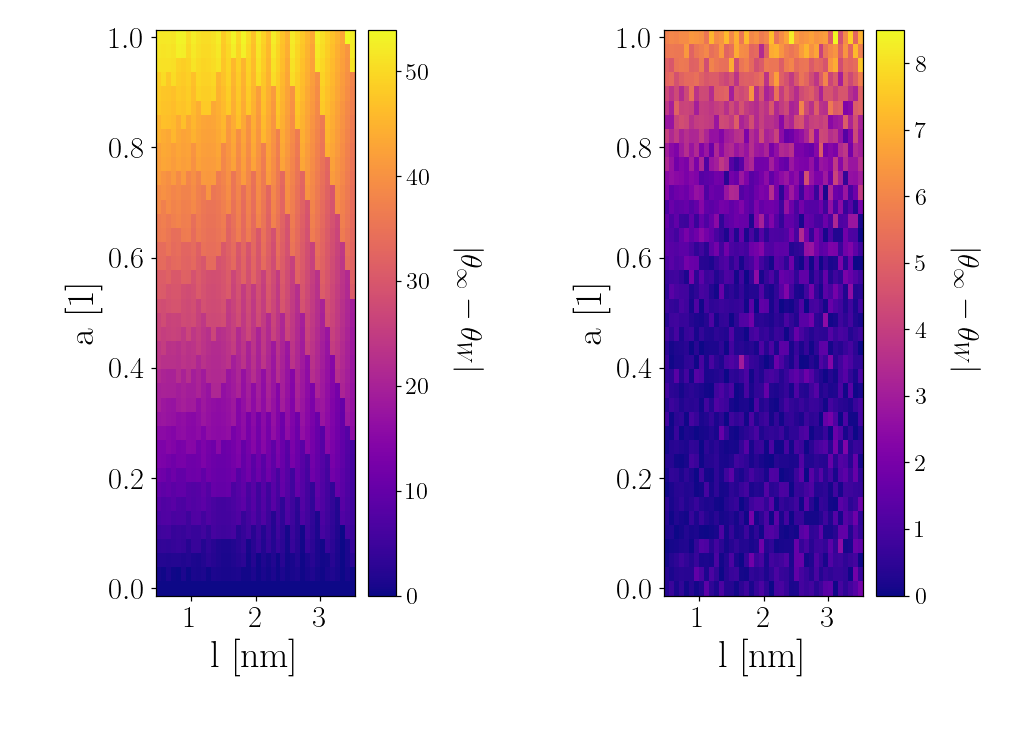

In [6]:
%matplotlib notebook

# vmax = max(np.max(d1),np.max(d2))

fig1, (ax1, ax2) = plt.subplots(1, 2)
# dmap1 = ax1.pcolormesh(L,A,d1,vmin=0,vmax=vmax,cmap=cm.plasma)
dmap1 = ax1.pcolormesh(L,A,d1,vmin=0,vmax=np.max(d1),cmap=cm.plasma)
ax1.set_xlabel('l [nm]',fontsize=FSL)
ax1.set_ylabel('a [1]',fontsize=FSL)
ax1.tick_params(labelsize=FST)
cb1 = plt.colorbar(dmap1,ax=ax1)
cb1.ax.set_ylabel(r'$|\theta_{\infty}-\theta_W|$', rotation=270,fontsize=0.8*FSL,labelpad=LBP)
cb1.ax.tick_params(labelsize=0.8*FST)
# dmap2 = ax2.pcolormesh(L,A,d2,vmin=0,vmax=vmax,cmap=cm.plasma)
dmap2 = ax2.pcolormesh(L,A,d2,vmin=0,vmax=np.max(d2),cmap=cm.plasma)
ax2.set_xlabel('l [nm]',fontsize=FSL)
ax2.set_ylabel('a [1]',fontsize=FSL)
ax2.tick_params(labelsize=FST)
cb2 = plt.colorbar(dmap2,ax=ax2)
cb2.ax.set_ylabel(r'$|\theta_{\infty}-\theta_W|$', rotation=270,fontsize=0.8*FSL,labelpad=LBP)
cb2.ax.tick_params(labelsize=0.8*FST)
plt.tight_layout()
plt.savefig('ca-hysteresis.png')
plt.show()

<IPython.core.display.Javascript object>


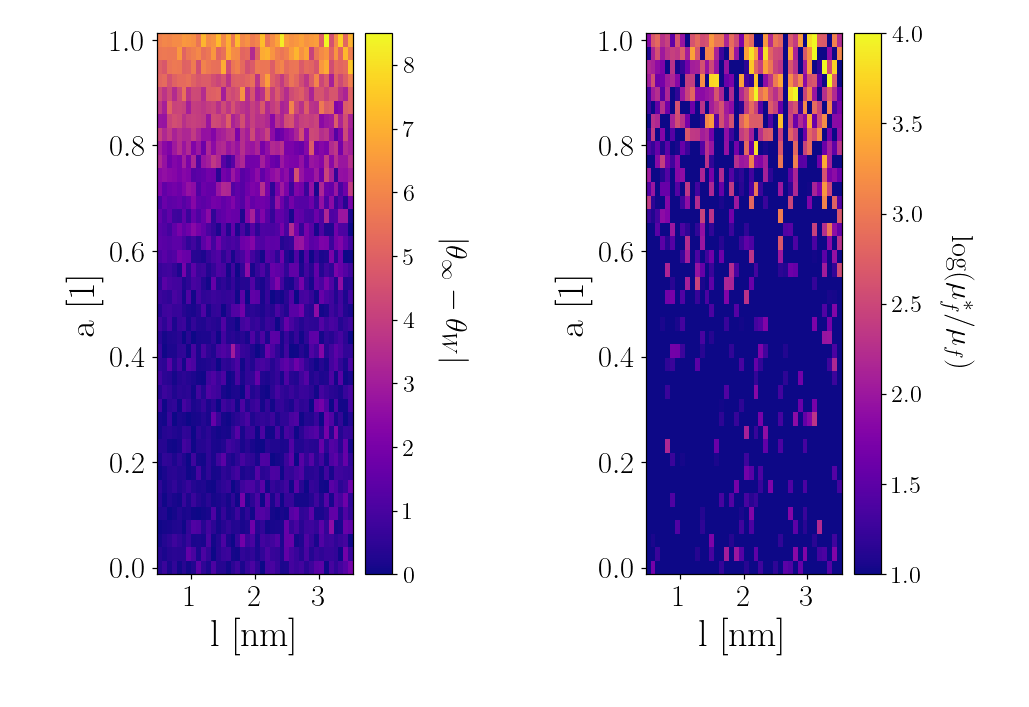

In [7]:
%matplotlib notebook

# vmax = max(np.max(d1),np.max(d2))

fig1, (ax1, ax2) = plt.subplots(1, 2)
# dmap1 = ax1.pcolormesh(L,A,d2,vmin=0,vmax=vmax,cmap=cm.plasma)
dmap1 = ax1.pcolormesh(L,A,d2,vmin=0,vmax=np.max(d2),cmap=cm.plasma)
ax1.set_xlabel('l [nm]',fontsize=FSL)
ax1.set_ylabel('a [1]',fontsize=FSL)
ax1.tick_params(labelsize=FST)
cb1 = plt.colorbar(dmap1,ax=ax1)
cb1.ax.set_ylabel(r'$|\theta_{\infty}-\theta_W|$', rotation=270,fontsize=0.8*FSL,labelpad=LBP)
cb1.ax.tick_params(labelsize=0.8*FST)
dmap2 = ax2.pcolormesh(L,A,np.log(mr),vmin=1,vmax=clf_plot_cutoff,cmap=cm.plasma)
# dmap2 = ax2.pcolormesh(L,A,mr,vmin=1,vmax=500,cmap=cm.plasma)
ax2.set_xlabel('l [nm]',fontsize=FSL)
ax2.set_ylabel('a [1]',fontsize=FSL)
ax2.tick_params(labelsize=FST)
cb2 = plt.colorbar(dmap2,ax=ax2)
cb2.ax.set_ylabel(r'$\log(\mu_f^*/\mu_f)$', rotation=270,fontsize=0.8*FSL,labelpad=LBP)
# cb2.ax.set_ylabel(r'$\mu_f^*/\mu_f$', rotation=270,fontsize=0.8*FSL,labelpad=LBP)
cb2.ax.tick_params(labelsize=0.8*FST)
plt.tight_layout()
plt.savefig('friction-amplification.png')
plt.show()